# Test evaluate method of SpiralArmsPotential
(by plotting the potential with various parameters)

Jack Hong

In [61]:
from galpy.potential import SpiralArmsPotential as spiral
from astropy import units as u
import matplotlib.pyplot as plt
import numpy as np

## Default values
(N=2, alpha=0.2, r_ref=1, phi_ref=0, Rs=0.5, H=0.5, Cs=[1], omega=0)

In [2]:
def plot_spiral(spiral_pot, t=0):
    ax = spiral_pot.plot(t=t, xy=True, rmin=-2, rmax=2, zmin=-2, zmax=2, ncontours=3, nrs=50)
    ax.set_cmap('coolwarm')
    ax.colorbar = plt.colorbar(ax)
    ax.__getattribute__('axes').set_ylim([2, -2])

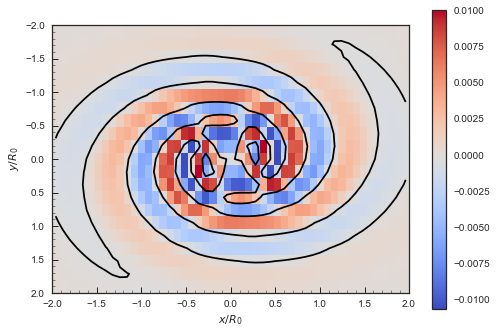

In [3]:
spiral_pot = spiral(omega=2*np.pi)
plot_spiral(spiral_pot, 1.5)
plt.show()

## Varying the reference angle $\phi_p$

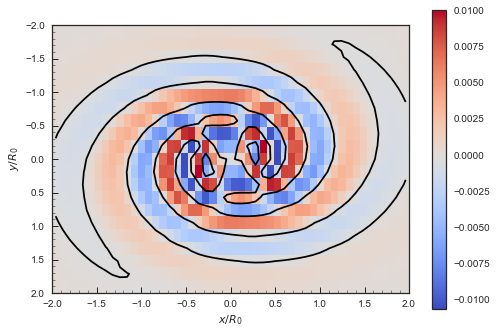

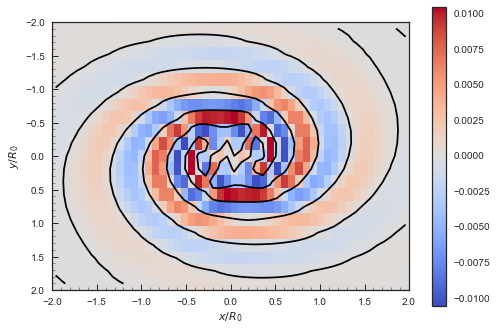

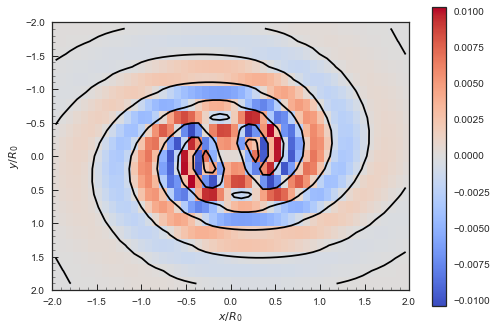

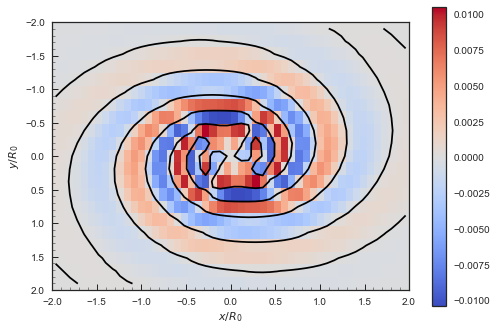

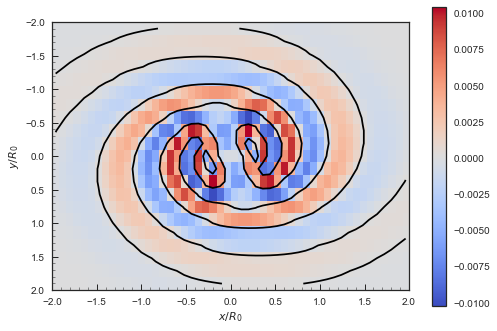

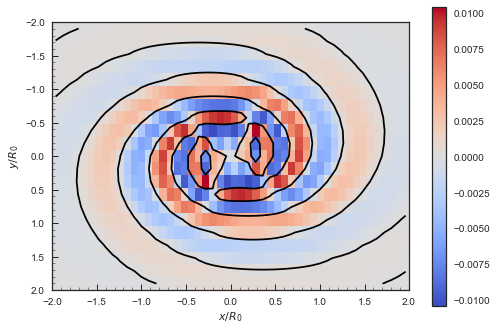

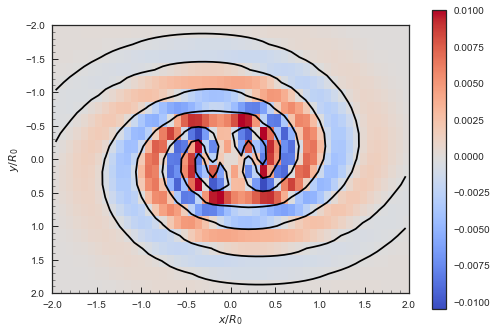

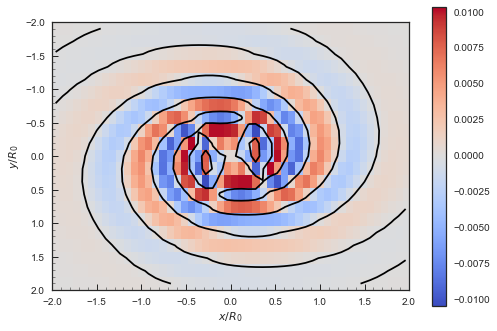

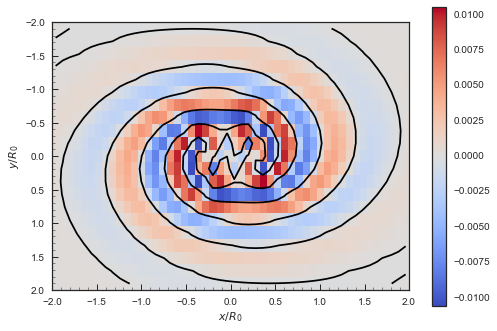

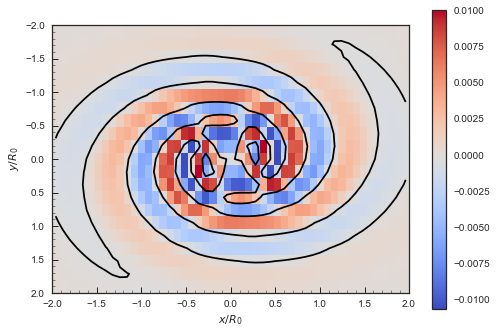

In [4]:
for phi_ref in np.linspace(0, 2*np.pi, 10):
    plot_spiral(spiral(phi_ref = phi_ref))
    
plt.show()

## Varying the pitch angle $\alpha$

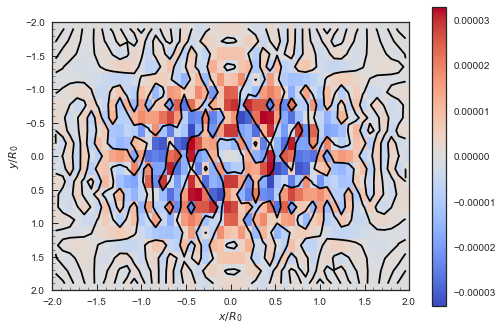

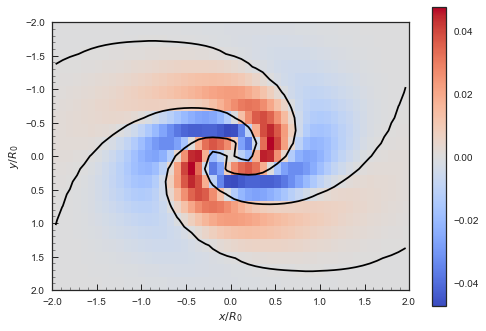

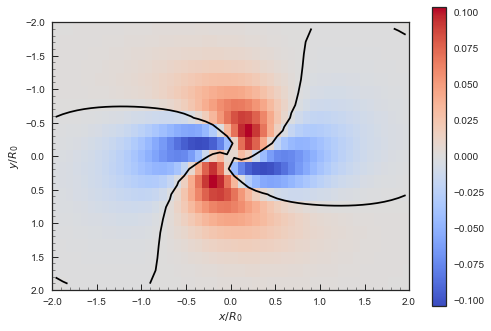

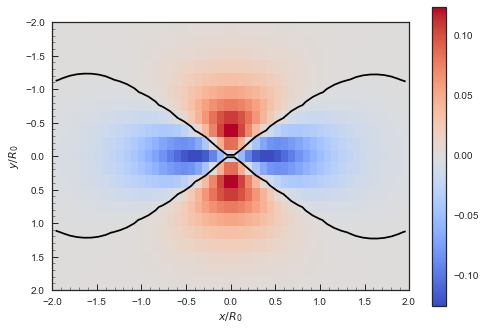

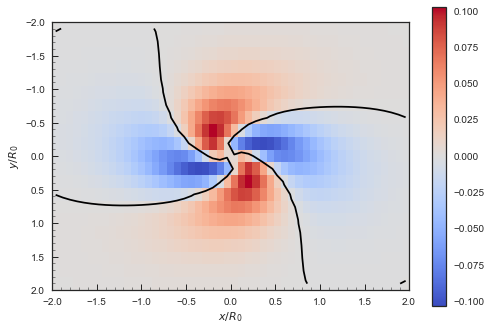

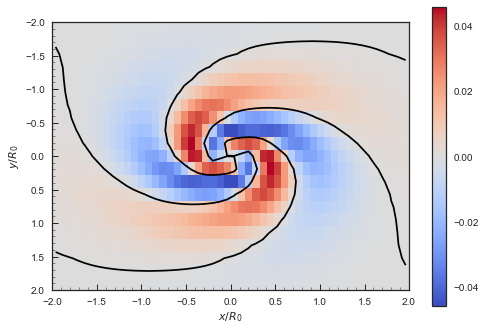

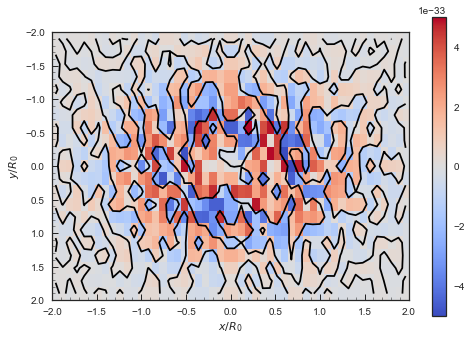

In [5]:
for alpha in np.linspace(0.01, np.pi, 7):
    plot_spiral(spiral(alpha=alpha))

plt.show()

## Varying the number of arms $N$

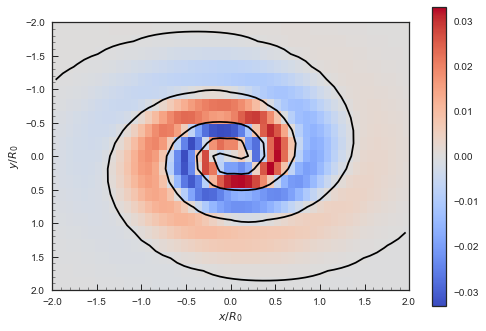

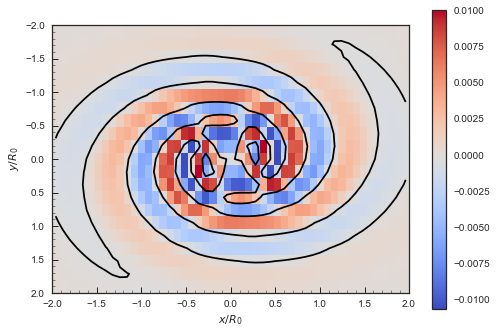

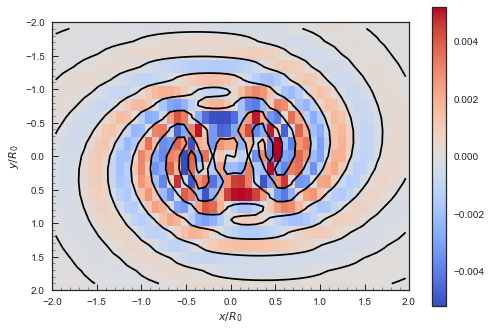

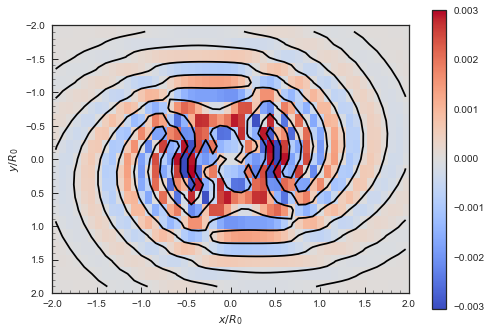

In [6]:
for N in range(1, 5):
    plot_spiral(spiral(N=N))
    
plt.show()

## Varying the radial scale length $R_s$

/Users/jackhong/OneDrive/SURP/galpy/galpy/potential_src/SpiralArmsPotential.py:565: RuntimeWarning: divide by zero encountered in true_divide
  return self._ns * self._N / R / self._sin_alpha

/Users/jackhong/OneDrive/SURP/galpy/galpy/potential_src/SpiralArmsPotential.py:573: RuntimeWarning: divide by zero encountered in true_divide
  HNn_R = self._HNn / R

/Users/jackhong/OneDrive/SURP/galpy/galpy/potential_src/SpiralArmsPotential.py:584: RuntimeWarning: divide by zero encountered in true_divide
  + self._HNn + R * self._sin_alpha) / (0.3 * self._HNn + R * self._sin_alpha)

/Users/jackhong/OneDrive/SURP/galpy/galpy/potential_src/SpiralArmsPotential.py:557: RuntimeWarning: divide by zero encountered in log
  return self._N * (phi - self._phi_ref - np.log(R / self._r_ref) / self._tan_alpha)

/Users/jackhong/OneDrive/SURP/galpy/galpy/potential_src/SpiralArmsPotential.py:149: RuntimeWarning: invalid value encountered in cos
  * np.sum(self._Cs / Ks / Ds * np.cos(self._ns * self._gamma(R, 

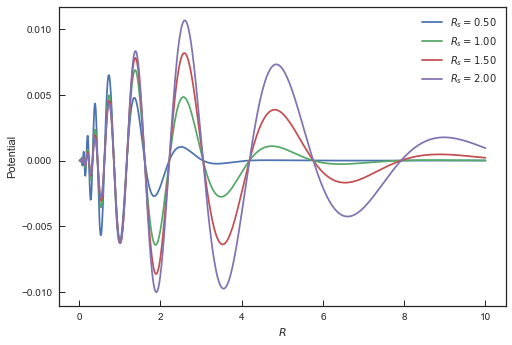

In [7]:
R = np.linspace(0, 10, 1000)
for Rs in np.linspace(0.5, 2, 4):
    spiral_pot = spiral(Rs=Rs)
    pots = np.zeros(R.size)
    
    for k in np.arange(R.size):
        pots[k] = spiral_pot(R[k], 0)
    
    plt.plot(R, pots, label="$R_s = {:.2f}$".format(Rs))  # (R, z, phi) = (R, 0, 0)
    
plt.xlabel("$R$")
plt.ylabel("Potential")
plt.legend()
plt.show()

## Varying the scale height $H$

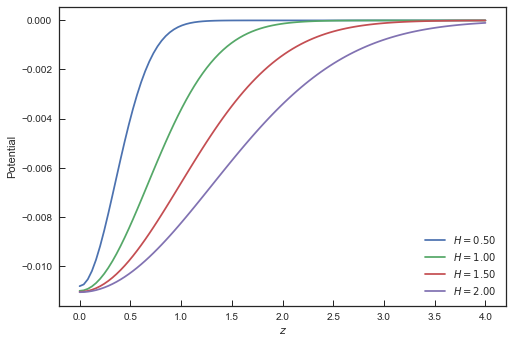

In [8]:
z = np.linspace(0, 4, 100)

for H in np.arange(0.5, 2.5, 0.5):
    spiral_pot = spiral(H=H)
    pots = np.zeros(z.size)
    
    for k in np.arange(z.size):
        pots[k] = spiral_pot(0.5, z[k])

    
    plt.plot(z, pots, label="$H = {:.2f}$".format(H))  # (R, z, phi) = (1, z, 0)

plt.xlabel("$z$")
plt.ylabel("Potential")    
plt.legend()
plt.show()

## Vary time

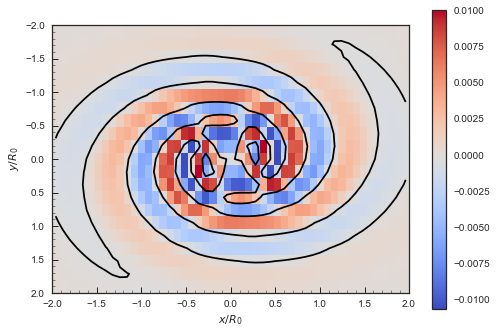

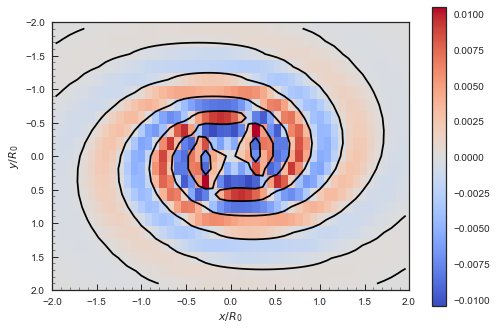

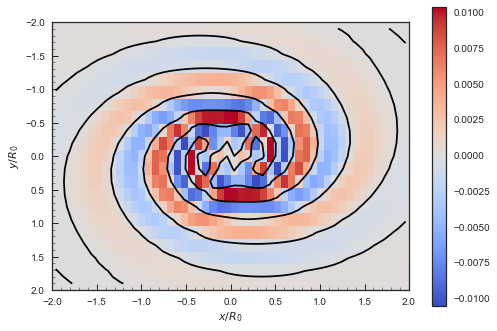

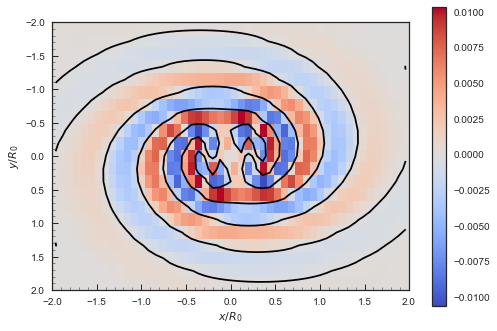

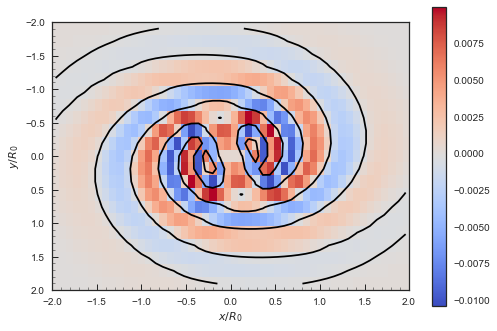

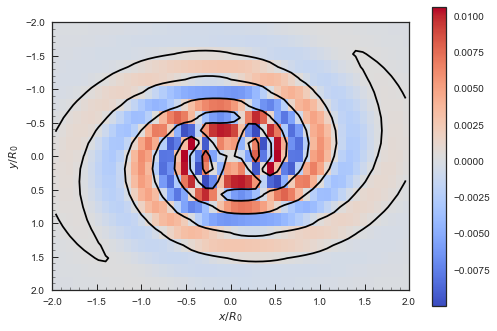

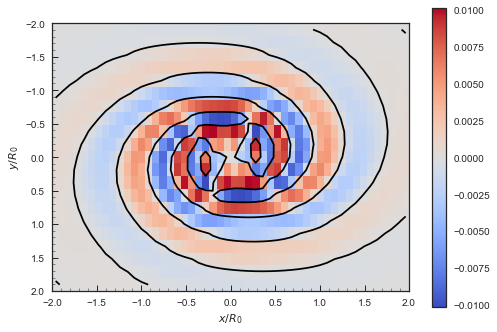

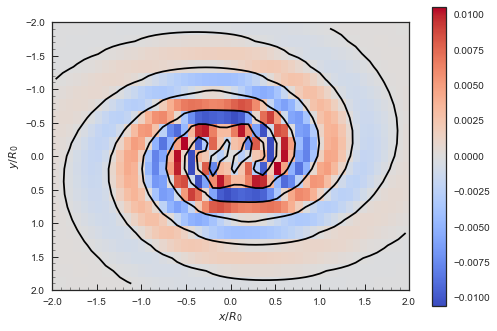

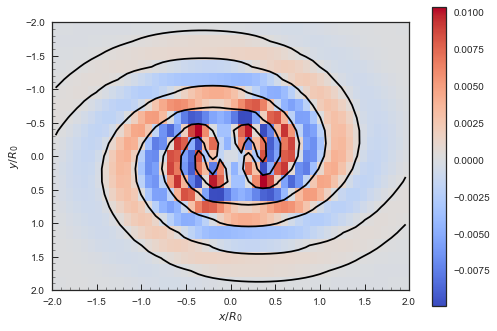

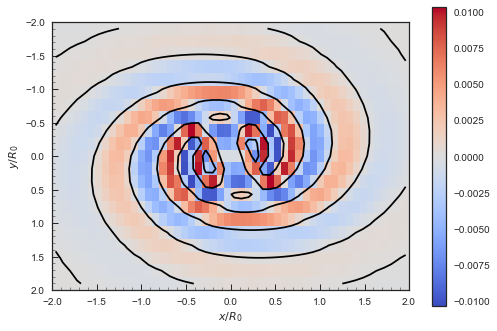

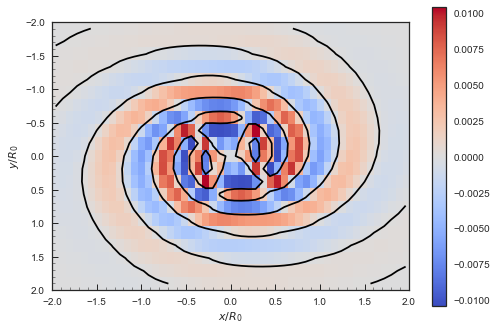

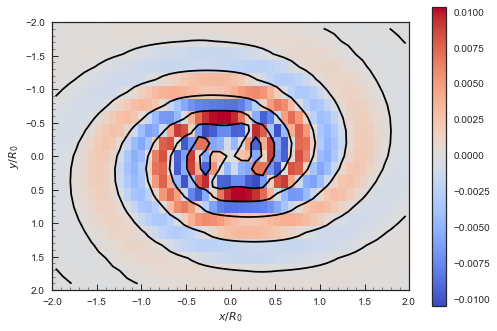

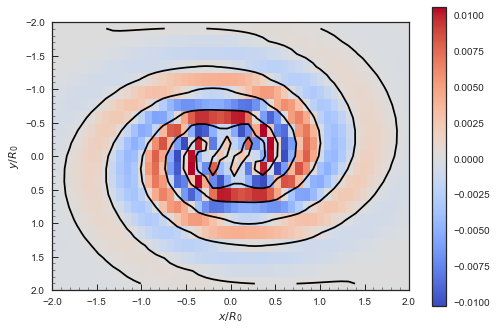

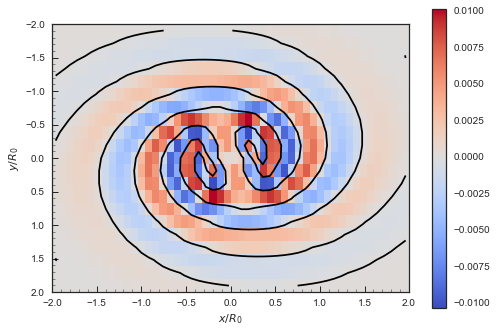

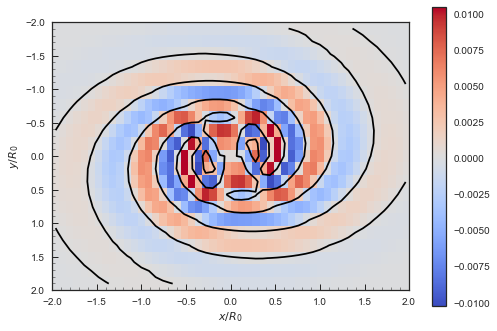

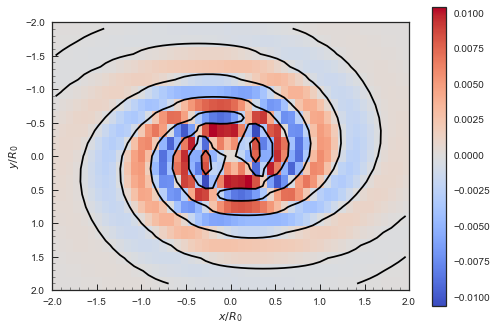

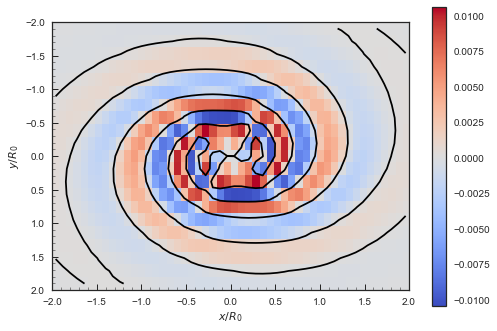

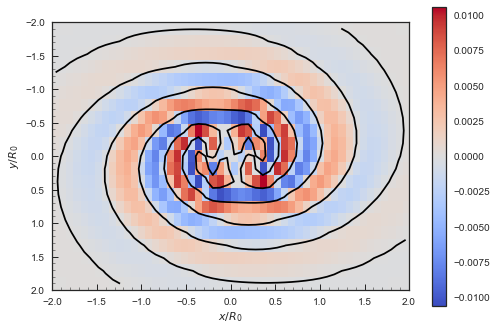

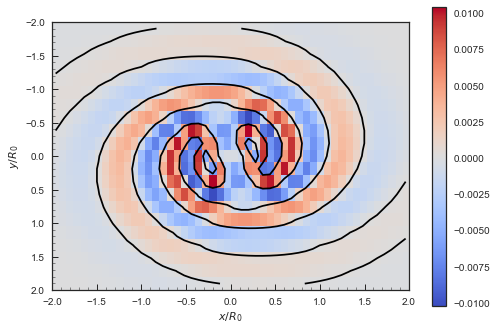

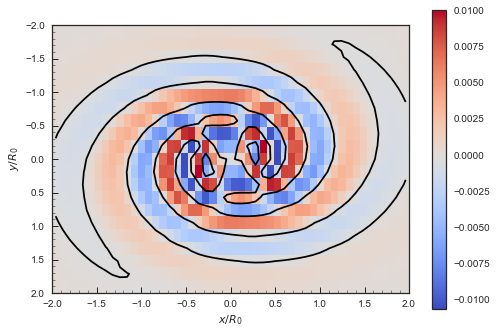

In [9]:
sp=spiral(omega=2*np.pi)
for t in np.linspace(0, 1, 20):
    plot_spiral(sp, t=t)
    
plt.show()

In [10]:
plot_spiral(sp, 0)
plot_spiral(sp, 500)

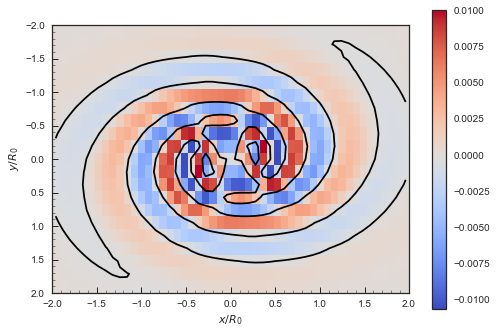

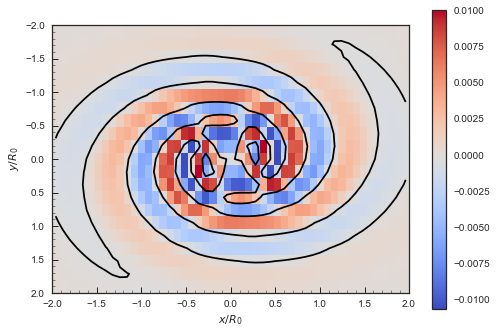

In [11]:
plt.show()

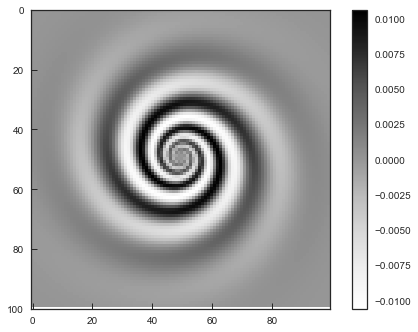

In [12]:
from galpy.util import bovy_coords
sp = spiral()
n = 100
xs = np.linspace(-2.0, 2.0, n)
ys = np.linspace(-2.0, 2.0, n)
X, Y = np.meshgrid(xs, ys)
potxy = np.zeros((n, n))

for ii in range(n):
    for jj in range(n):
        R, phi, z = bovy_coords.rect_to_cyl(xs[ii], ys[jj], 0)
        potxy[ii, jj] = sp(R, z, phi)

c = plt.imshow(potxy)
plt.colorbar(c)
plt.ylim([100, 0])
plt.show()

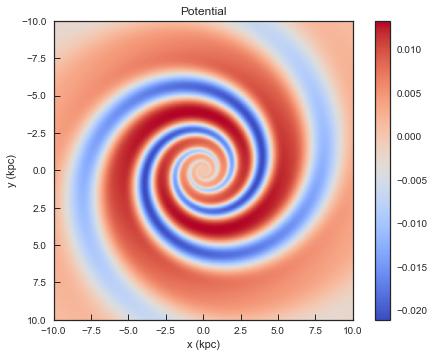

In [77]:
from galpy.util import bovy_coords
sp = spiral(amp=2, alpha=0.23, Cs=[8/3/np.pi, 0.5, 8/15/np.pi])
n = 1000
xs = np.linspace(-10, 10, n) * u.kpc
ys = np.linspace(-10, 10, n) * u.kpc
X, Y = np.meshgrid(xs, ys)
potxy = np.zeros((n, n))

for ii in range(n):
    for jj in range(n):
        R, phi, z = bovy_coords.rect_to_cyl(xs[ii].value, ys[jj].value, 0)
        R, z = (R, z) * u.kpc
        potxy[ii, jj] = sp(R, z, phi)

c = plt.imshow(potxy.T, origin='lower', cmap='coolwarm', extent=[-10, 10, -10, 10])
plt.xlabel('x (kpc)')
plt.ylabel('y (kpc)')
plt.title('Potential')
plt.colorbar(c)
plt.gca().invert_yaxis()
plt.show()

In [30]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from galpy.potential import MWPotential2014, evaluateDensities, evaluatePotentials

In [156]:
def make_figs_from_paper(plt_type='dens', arm_type='sin', add_mp=False, amp=2, N=2, alpha=15*u.deg, Rs=7*u.kpc,
                         r_ref=8*u.kpc, H=0.18*u.kpc):

    if arm_type == 'sin':
        Cs = [1]
    elif arm_type == 'con':
        Cs = [8./3./np.pi, 0.5, 8./15./np.pi]
       
    sp = spiral(amp=2, N=N, alpha=alpha, Rs=Rs, r_ref=r_ref, H=H, Cs=Cs)
    if add_mp:
        sp = [sp] + MWPotential2014
    
    fig = plt.figure(figsize=(13,10))
    ax = fig.gca(projection='3d')

    # Make data.
    Rn = np.linspace(3, 10) * u.kpc
    Zn = np.linspace(-1.5, 1.5) * u.kpc
    R, Z = np.meshgrid(Rn, Zn)

    data = np.empty((len(Rn), len(Zn)))

    for ii in range(len(R)):
        for jj in range(len(Z)):
            if plt_type == 'dens':
                data[ii, jj] = evaluateDensities(sp, Rn[ii], Zn[jj], 0)
            elif plt_type == 'pot':
                data[ii, jj] = evaluatePotentials(sp, Rn[ii], Zn[jj], 0)

    # Plot the surface.
    surf = ax.plot_surface(R, Z, data.T, cmap='coolwarm')

    # Customize axis.
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.03f'))
    if plt_type == 'dens':
        ax.set_zlabel('Density', fontsize=18, labelpad=12)
    elif plt_type == 'pot':
            ax.set_zlabel('Potential', fontsize=18, labelpad=12)
    ax.set_xlabel('R (kpc)', fontsize=18, labelpad=10)
    ax.set_ylabel('z (kpc)', fontsize=18, labelpad=10)

    # Add a color bar which maps values to colors.
    #fig.colorbar(surf, shrink=0.5, aspect=5)
    fig.tight_layout

    plt.show()

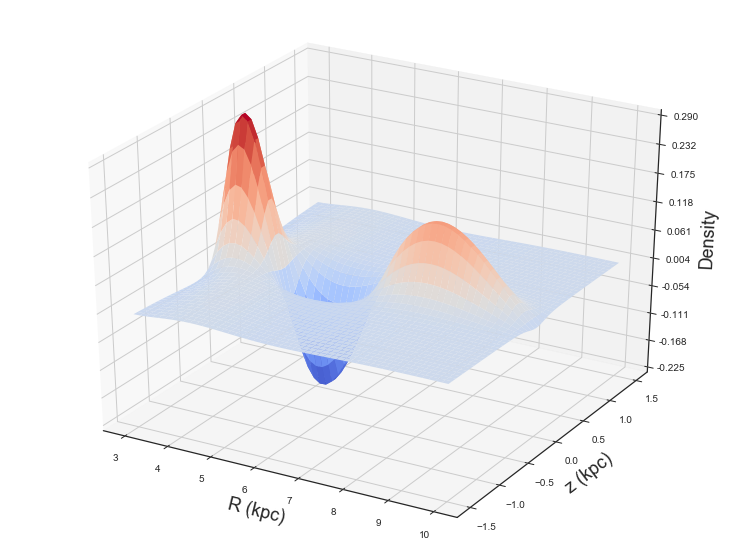

In [157]:
make_figs_from_paper()

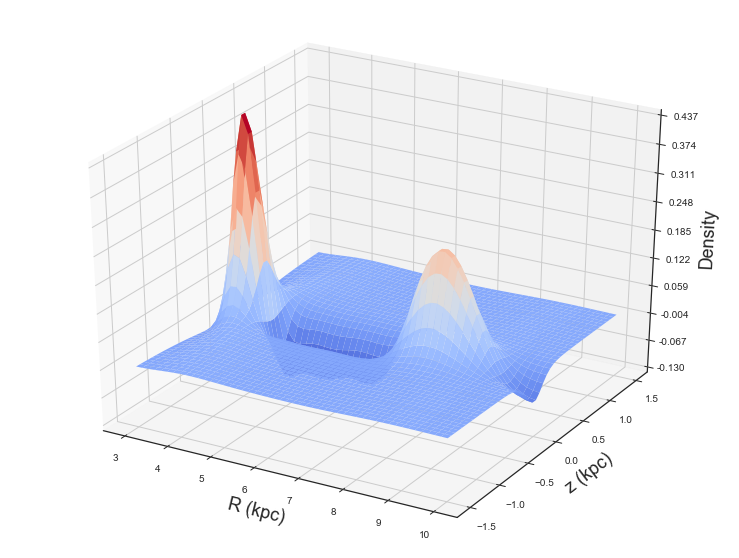

In [158]:
make_figs_from_paper(arm_type='con')

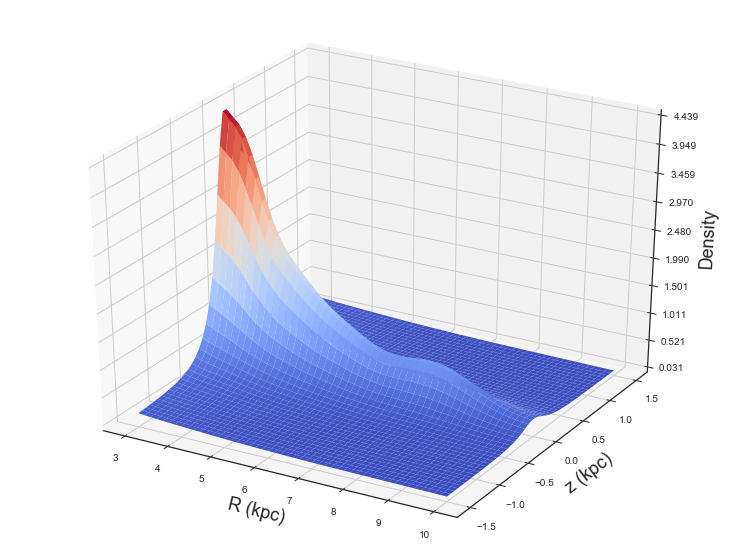

In [159]:
make_figs_from_paper(arm_type='con', add_mp=True)

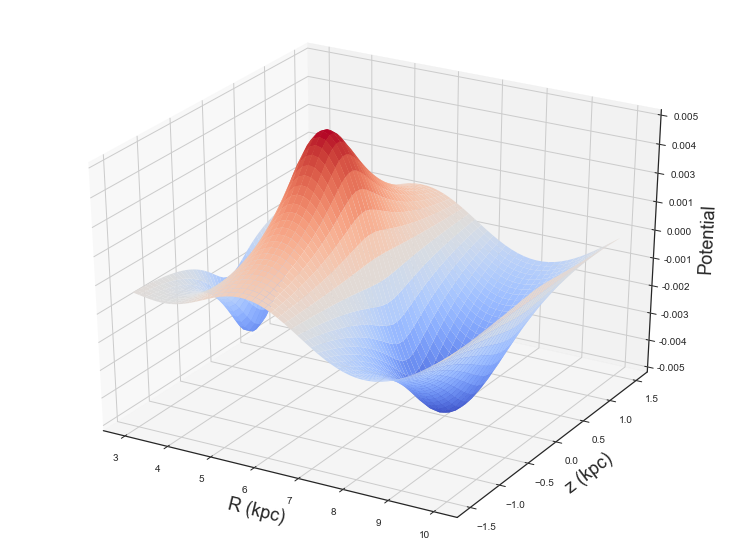

In [160]:
make_figs_from_paper(plt_type='pot', arm_type='sin')

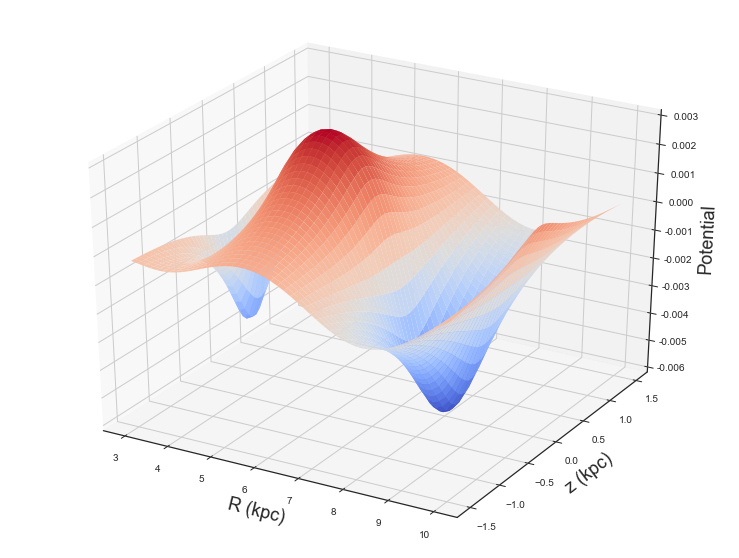

In [161]:
make_figs_from_paper(plt_type='pot', arm_type='con')

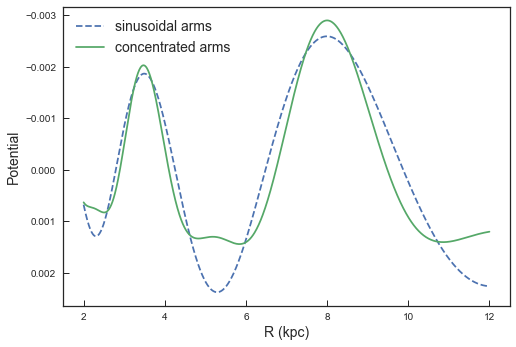

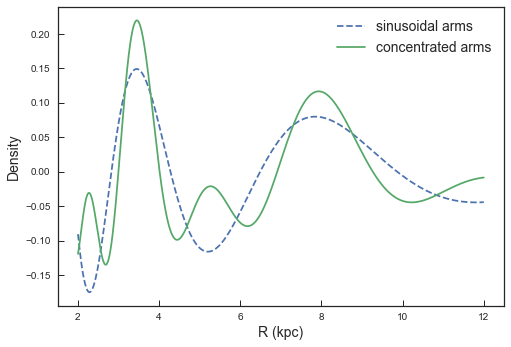

In [162]:
sp_sin = spiral(N=2, alpha=15*u.deg, Rs=7*u.kpc, r_ref=8*u.kpc, H=0.18*u.kpc)
sp_con = spiral(amp=1.3, N=2, alpha=15*u.deg, Rs=7*u.kpc, r_ref=8*u.kpc, H=0.18*u.kpc, Cs=[8/3/np.pi, 0.5, 8/15/np.pi])
R = np.linspace(2, 12, 1000) * u.kpc

dens_sin = np.empty(len(R))
dens_con = np.empty(len(R))
pots_sin = np.empty(len(R))
pots_con = np.empty(len(R))

phi, z = 0, 0
for k in range(len(R)):
    dens_sin[k] = sp_sin.dens(R[k], z, phi)
    dens_con[k] = sp_con.dens(R[k], z, phi)
    pots_sin[k] = sp_sin(R[k], z, phi)
    pots_con[k] = sp_con(R[k], z, phi)

plt.figure()
plt.plot(R, pots_sin, label='sinusoidal arms', linestyle='--')
plt.plot(R, pots_con, label='concentrated arms')
plt.gca().invert_yaxis()
plt.xlabel('R (kpc)', fontsize=14)
plt.ylabel('Potential', fontsize=14)
plt.legend(fontsize=14)

plt.figure()
plt.plot(R, dens_sin, label='sinusoidal arms', linestyle='--')
plt.plot(R, dens_con, label='concentrated arms')
plt.xlabel('R (kpc)', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(fontsize=14)
plt.show()

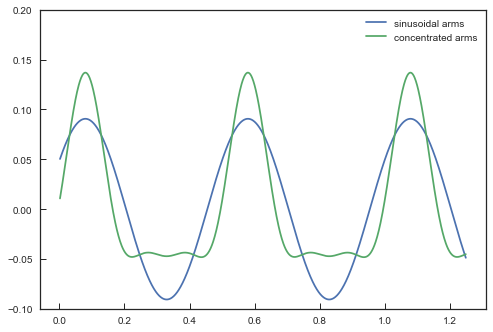

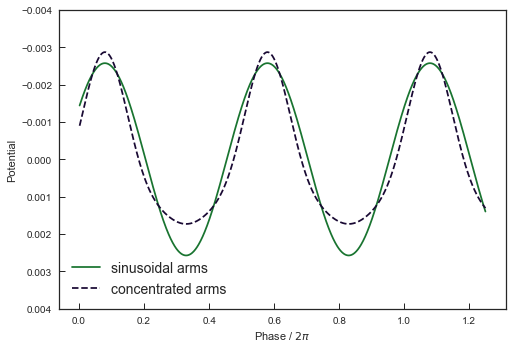

In [169]:
sp_sin = spiral(N=2, alpha=15*u.deg, Rs=7*u.kpc, r_ref=8*u.kpc, H=0.18*u.kpc)
sp_con = spiral(N=2, alpha=15*u.deg, Rs=7*u.kpc, r_ref=8*u.kpc, H=0.18*u.kpc, Cs=[8./3./np.pi, 0.5, 8./15./np.pi])

phi = np.linspace(0.01, 5./2*np.pi, 1000)
R, z = 7*u.kpc, 0

dens_sin = np.empty(len(phi))
dens_con = np.empty(len(phi))
pots_sin = np.empty(len(phi))
pots_con = np.empty(len(phi))

for k in range(len(phi)):
    dens_sin[k] = sp_sin.dens(R, z, phi[k])
    dens_con[k] = sp_con.dens(R, z, phi[k])
    pots_sin[k] = sp_sin(R, z, phi[k])
    pots_con[k] = sp_con(R, z, phi[k])
   
plt.figure()
plt.plot(phi/2/np.pi, dens_sin, label='sinusoidal arms')
plt.plot(phi/2/np.pi, dens_con, label='concentrated arms')
plt.ylim([-.1, .2])
plt.legend(loc='best')
plt.show()

plt.figure()
plt.plot(phi/2/np.pi, pots_sin, label='sinusoidal arms', color='#197430')
plt.plot(phi/2/np.pi, pots_con, label='concentrated arms', color='#190933', linestyle='--')
plt.ylim([-.004, 0.004])
plt.gca().invert_yaxis()
plt.ylabel('Potential')
plt.xlabel('Phase / $2\pi$')
plt.legend(fontsize=14)
plt.show()